## Homework

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1OKFSv2GpuUFDphO0r8LdM7bl6MAWwBfX' -O data.csv

--2021-12-12 07:55:24--  https://docs.google.com/uc?export=download&id=1OKFSv2GpuUFDphO0r8LdM7bl6MAWwBfX
Resolving docs.google.com (docs.google.com)... 142.250.125.101, 142.250.125.113, 142.250.125.139, ...
Connecting to docs.google.com (docs.google.com)|142.250.125.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/r1rlvdthdckme68j2c8ifq0n50f69mu2/1639295700000/03856158561714992485/*/1OKFSv2GpuUFDphO0r8LdM7bl6MAWwBfX?e=download [following]
--2021-12-12 07:55:26--  https://doc-04-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/r1rlvdthdckme68j2c8ifq0n50f69mu2/1639295700000/03856158561714992485/*/1OKFSv2GpuUFDphO0r8LdM7bl6MAWwBfX?e=download
Resolving doc-04-ak-docs.googleusercontent.com (doc-04-ak-docs.googleusercontent.com)... 209.85.147.132, 2607:f8b0:4001:c20::84
Connecting to doc-04-ak-docs.googleusercontent.com (doc-04-

В этой домашней работе вы будете предсказывать стоимость домов по их характеристикам.

Метрика качества: `RMSE`

Оценивание:
* Baseline - 2 балла
* Feature Engineering - 2 балла
* Model Selection - 3 балла
* Ensemble v.1 - 3 балла
* (*) Ensemble v.2 - дополнительно, 2 балла

### Описание датасета

Короткое описание данных:
```
price: sale price (this is the target variable)
id: transaction id
timestamp: date of transaction
full_sq: total area in square meters, including loggias, balconies and other non-residential areas
life_sq: living area in square meters, excluding loggias, balconies and other non-residential areas
floor: for apartments, floor of the building
max_floor: number of floors in the building
material: wall material
build_year: year built
num_room: number of living rooms
kitch_sq: kitchen area
state: apartment condition
product_type: owner-occupier purchase or investment
sub_area: name of the district

The dataset also includes a collection of features about each property's surrounding neighbourhood, and some features that are constant across each sub area (known as a Raion). Most of the feature names are self explanatory, with the following notes. See below for a complete list.

full_all: subarea population
male_f, female_f: subarea population by gender
young_*: population younger than working age
work_*: working-age population
ekder_*: retirement-age population
n_m_{all|male|female}: population between n and m years old
build_count_*: buildings in the subarea by construction type or year
x_count_500: the number of x within 500m of the property
x_part_500: the share of x within 500m of the property
_sqm_: square meters
cafe_count_d_price_p: number of cafes within d meters of the property that have an average bill under p RUB
trc_: shopping malls
prom_: industrial zones
green_: green zones
metro_: subway
_avto_: distances by car
mkad_: Moscow Circle Auto Road
ttk_: Third Transport Ring
sadovoe_: Garden Ring
bulvar_ring_: Boulevard Ring
kremlin_: City center
zd_vokzaly_: Train station
oil_chemistry_: Dirty industry
ts_: Power plant
```

### Setup

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("data.csv", parse_dates=["timestamp"])

Разделите имеющиеся у вас данные на обучающую и тестовую выборки. В качестве обучающей выборки возьмите первые 80% данных, последние 20% - тестовая выборка.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.shape

(20000, 292)

Возможно в ваших моделях вам придется указывать, какие колонки являются категориальными (например, в бустингах). Для упрощения предлагается разделить колонки по следующему принципу:
```
drop_columns = [
    'id',           # May leak information
    'timestamp',    # May leak information
]
cat_columns = [
    'product_type',              #
    'material',                  # Material of the wall
    'state',                     # Satisfaction level
    'sub_area',                  # District name
    'culture_objects_top_25',    #
    'thermal_power_plant_raion', #
    'incineration_raion',        #
    'oil_chemistry_raion',       #
    'radiation_raion',           #
    'railroad_terminal_raion',   #
    'big_market_raion',          #
    'nuclear_reactor_raion',     #
    'detention_facility_raion',  #
    'ID_metro',                  #
    'ID_railroad_station_walk',  #
    'ID_railroad_station_avto',  #
    'water_1line',               #
    'ID_big_road1',              #
    'big_road1_1line',           #
    'ID_big_road2',              #
    'railroad_1line',            #
    'ID_railroad_terminal',      #
    'ID_bus_terminal',           #
    'ecology',                   #
]
num_columns = list(set(df.columns).difference(set(cat_columns + drop_columns)))
```

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 292 entries, id to price
dtypes: datetime64[ns](1), float64(119), int64(157), object(15)
memory usage: 44.6+ MB


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 292 entries, id to price
dtypes: datetime64[ns](1), float64(119), int64(157), object(15)
memory usage: 44.6+ MB
None


In [ ]:
drop_columns = df[['id', 'timestamp']]
cat_columns = df[[
    'product_type',              #
    'material',                  # Material of the wall
    'state',                     # Satisfaction level
    'sub_area',                  # District name
    'culture_objects_top_25',    #
    'thermal_power_plant_raion', #
    'incineration_raion',        #
    'oil_chemistry_raion',       #
    'radiation_raion',           #
    'railroad_terminal_raion',   #
    'big_market_raion',          #
    'nuclear_reactor_raion',     #
    'detention_facility_raion',  #
    'ID_metro',                  #
    'ID_railroad_station_walk',  #
    'ID_railroad_station_avto',  #
    'water_1line',               #
    'ID_big_road1',              #
    'big_road1_1line',           #
    'ID_big_road2',              #
    'railroad_1line',            #
    'ID_railroad_terminal',      #
    'ID_bus_terminal',           #
    'ecology',                   #
]]
num_columns = list(set(df.columns).difference(set(cat_columns + drop_columns)))

In [ ]:
cat_columns

,product_type,material,state,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,ID_metro,ID_railroad_station_walk,ID_railroad_station_avto,water_1line,ID_big_road1,big_road1_1line,ID_big_road2,railroad_1line,ID_railroad_terminal,ID_bus_terminal,ecology
0,OwnerOccupier,1.0,1.0,Nagornoe,no,no,no,no,no,no,no,no,no,18,2.0,42,no,2,no,4,no,32,2,poor
1,OwnerOccupier,NaN,NaN,Poselenie Sosenskoe,no,no,no,no,no,no,yes,no,no,132,47.0,105,no,38,no,1,no,32,8,no data
2,Investment,1.0,3.0,Krylatskoe,no,no,no,no,no,no,no,no,yes,92,10.0,22,no,29,no,1,no,50,1,good
3,Investment,NaN,NaN,Matushkino,no,no,no,no,no,no,no,no,no,12,28.0,28,no,14,no,49,no,83,1,no data
4,Investment,1.0,2.0,Gol'janovo,no,no,no,no,yes,no,no,no,no,20,18.0,136,yes,1,no,12,no,97,7,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Investment,1.0,2.0,Jasenevo,no,no,no,no,yes,no,no,no,no,79,42.0,73,yes,1,no,43,no,32,8,good
19996,OwnerOccupier,1.0,1.0,Poselenie Sosenskoe,no,no,no,no,no,no,yes,no,no,45,47.0,105,no,38,no,1,no,32,8,no data
19997,Investment,1.0,2.0,Moskvorech'e-Saburovo,no,no,no,no,yes,no,no,yes,no,71,29.0,27,no,2,no,4,no,32,2,excellent
19998,Investment,1.0,NaN,Poselenie Moskovskij,no,no,no,no,no,no,no,no,no,206,24.0,19,no,13,no,38,no,50,8,no data


In [ ]:
df.isna().any().sum(axis=0)

51

In [ ]:
columns_with_missed_values = df.isna().sum()[df.isna().sum() > 0].index
columns_with_missed_values.shape

(51,)

In [ ]:
df[columns_with_missed_values]

,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,preschool_quota,school_quota,hospital_beds_raion,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_walk,metro_km_walk,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,prom_part_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2279.0,10027.0,NaN,244.0,71.0,0.0,0.0,105.0,4.0,64.0,0.0,0.0,0.0,243.0,0.0,1.0,153.0,56.0,33.0,5.023493,0.418624,3.053683,36.644198,2.0,500.00,1000.00,750.00,400.00,750.00,575.00,735.29,1235.29,985.29,665.79,1157.89,911.84,705.32,1186.17,945.74,19.83,755.99,1263.47,1009.73
1,64.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.679494,6.306624,10.463345,125.560144,47.0,NaN,NaN,NaN,500.00,1000.00,750.00,500.00,1000.00,750.00,500.00,1000.00,750.00,1750.00,2875.00,2312.50,8.70,1108.33,1833.33,1470.83
2,44.0,9.0,17.0,1.0,1985.0,3.0,10.0,3.0,3092.0,7478.0,NaN,188.0,3.0,3.0,0.0,66.0,27.0,89.0,0.0,0.0,0.0,188.0,1.0,0.0,3.0,81.0,103.0,3.359196,0.279933,4.389323,52.671880,10.0,762.50,1250.00,1006.25,885.71,1464.29,1175.00,955.56,1583.33,1269.44,890.63,1500.00,1195.31,987.50,1645.83,1316.67,4.58,923.26,1523.26,1223.26
3,49.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2080.0,3885.0,NaN,107.0,23.0,0.0,0.0,10.0,16.0,58.0,0.0,0.0,0.0,107.0,0.0,0.0,46.0,15.0,46.0,294.672161,24.556013,4.935636,59.227626,28.0,300.00,500.00,400.00,340.00,600.00,470.00,340.00,600.00,470.00,525.00,875.00,700.00,500.00,850.00,675.00,7.28,507.14,857.14,682.14
4,42.0,9.0,9.0,1.0,1970.0,3.0,6.0,2.0,5041.0,11081.0,125.0,371.0,88.0,0.0,0.0,68.0,8.0,207.0,0.0,0.0,0.0,371.0,0.0,1.0,221.0,129.0,20.0,27.544802,2.295400,6.879740,82.556879,18.0,300.00,500.00,400.00,366.67,666.67,516.67,520.00,900.00,710.00,518.18,909.09,713.64,608.33,1020.83,814.58,9.08,656.00,1110.00,883.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,27.0,2.0,9.0,1.0,1978.0,2.0,5.0,2.0,4172.0,10559.0,2300.0,175.0,16.0,5.0,0.0,2.0,0.0,150.0,0.0,2.0,0.0,175.0,0.0,2.0,7.0,159.0,7.0,19.786133,1.648844,11.210426,134.525109,42.0,300.00,500.00,400.00,400.00,750.00,575.00,485.71,857.14,671.43,544.44,944.44,744.44,576.32,986.84,781.58,7.54,622.97,1054.05,838.51
19996,NaN,4.0,17.0,1.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.800122,6.150010,10.037414,120.448965,47.0,NaN,NaN,NaN,500.00,1000.00,750.00,500.00,1000.00,750.00,500.00,1000.00,750.00,1750.00,2875.00,2312.50,7.92,1191.67,1916.67,1554.17
19997,14.0,9.0,22.0,1.0,2001.0,1.0,10.0,2.0,3150.0,5519.0,2715.0,153.0,4.0,0.0,0.0,75.0,3.0,71.0,0.0,0.0,0.0,153.0,0.0,0.0,78.0,54.0,21.0,16.208502,1.350709,3.738577,44.862929,29.0,400.00,750.00,575.00,450.00,875.00,662.50,490.00,900.00,695.00,569.23,1000.00,784.62,637.50,1100.00,868.75,22.68,673.57,1142.86,908.21
19998,30.0,8.0,17.0,1.0,2011.0,2.0,9.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,83.379523,6.948294,8.961726,107.540712,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.00,1000.00,750.00,5.13,833.33,1416.67,1125.00


In [ ]:
df.isna().sum().sum()

169607

У нас очень много пропущенных данных, их примерно 169 тысяч. Воспользуемся Multiple Imputations with Random Forests: https://pythonrepo.com/repo/AnotherSamWilson-miceforest-python-python-implementation-of-algorithms-and-design-patterns

In [ ]:
!pip install miceforest --no-cache-dir

     |████████████████████████████████| 69 kB 6.3 MB/s 


In [ ]:
import miceforest as mf

In [ ]:
!pip install scipy --upgrade

     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
df.drop('timestamp', axis=1, inplace=True)

In [ ]:
df = pd.get_dummies(df)

In [ ]:
kernel = mf.ImputationKernel(
                             df, 
                             datasets=1, 
                             save_all_iterations=True, 
                             random_state=42,
                             )
kernel.mice()
print(kernel)

              Class: ImputationKernel
           Datasets: 1
         Iterations: 5
  Imputed Variables: 51
save_all_iterations: True


In [ ]:
completed_dataset = kernel.complete_data(dataset=0, inplace=False)
print(completed_dataset.isnull().sum().sum())

0


Ячейка выполнялась 30 минут, поэтому я сохраню получившийся фрейм и пойду спать

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
completed_dataset.to_csv('completed_dataset.csv', encoding='utf-8', index=False)
!cp completed_dataset.csv "drive/MyDrive/"

In [ ]:
completed_dataset

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,...,sub_area_Veshnjaki,sub_area_Vnukovo,sub_area_Vojkovskoe,sub_area_Vostochnoe,sub_area_Vostochnoe Degunino,sub_area_Vostochnoe Izmajlovo,sub_area_Vyhino-Zhulebino,sub_area_Zamoskvorech'e,sub_area_Zapadnoe Degunino,sub_area_Zjablikovo,sub_area_Zjuzino,culture_objects_top_25_no,culture_objects_top_25_yes,thermal_power_plant_raion_no,thermal_power_plant_raion_yes,incineration_raion_no,incineration_raion_yes,oil_chemistry_raion_no,oil_chemistry_raion_yes,radiation_raion_no,radiation_raion_yes,railroad_terminal_raion_no,railroad_terminal_raion_yes,big_market_raion_no,big_market_raion_yes,nuclear_reactor_raion_no,nuclear_reactor_raion_yes,detention_facility_raion_no,detention_facility_raion_yes,water_1line_no,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.293465e+06,77878,0.023464,0.195781,4713,2279.0,4,5212,10027.0,8,1,2729.0,3,0,2,2,0,2,6,115352,52813,62539,10600,5422,5178,49882,24603,25279,17396,5130,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
1,1,64,64.0,16.0,16.0,1.0,2014.0,2.0,1.0,1.0,6.677245e+07,9553,0.336177,0.072158,656,1065.0,0,629,3068.0,0,0,540.0,0,0,1,0,0,0,1,13890,6584,7307,1370,709,661,6127,3237,2890,2056,583,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0
2,2,83,44.0,9.0,17.0,1.0,1985.0,3.0,10.0,3.0,1.216448e+07,78507,0.297166,0.000000,4611,3092.0,7,5067,7478.0,7,0,125.0,2,0,14,1,0,6,4,67710,33382,34328,10175,5105,5070,48620,25579,23041,19712,6368,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0
3,3,71,49.0,2.0,13.0,1.0,2003.0,3.0,12.0,3.0,4.708040e+06,38075,0.271702,0.310199,2448,2080.0,3,2748,3885.0,4,0,1815.0,0,0,0,0,0,0,1,85219,39138,46081,5572,2978,2594,22413,11273,11140,10090,2911,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0
4,4,60,42.0,9.0,9.0,1.0,1970.0,3.0,6.0,2.0,1.428699e+07,157010,0.389354,0.194489,7751,5041.0,6,8004,11081.0,7,0,125.0,3,0,5,3,0,5,3,12327,5588,6739,16831,8637,8194,98260,47405,50855,41919,12424,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,45,27.0,2.0,9.0,1.0,1978.0,2.0,5.0,2.0,2.481385e+07,174831,0.683844,0.037178,10712,4172.0,7,11217,10559.0,7,0,2300.0,1,0,7,7,0,7,1,178264,82799,95465,23483,12083,11400,105171,52848,52323,46177,14748,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0
19996,19996,38,38.0,4.0,17.0,1.0,2014.0,2.0,1.0,1.0,6.677245e+07,9553,0.336177,0.072158,656,1065.0,0,629,2367.0,0,0,350.0,0,0,1,0,0,0,1,13890,6584,7307,1370,709,661,6127,3237,2890,2056,583,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0
19997,19997,35,14.0,9.0,22.0,1.0,2001.0,1.0,10.0,2.0,1.004686e+07,76156,0.071056,0.246032,3816,3150.0,5,3151,5519.0,5,0,2715.0,3,1,7,6,0,3,4,130229,60619,69610,7296,3649,3647,52450,26354,26096,16410,4819,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,

In [ ]:
df

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,...,sub_area_Veshnjaki,sub_area_Vnukovo,sub_area_Vojkovskoe,sub_area_Vostochnoe,sub_area_Vostochnoe Degunino,sub_area_Vostochnoe Izmajlovo,sub_area_Vyhino-Zhulebino,sub_area_Zamoskvorech'e,sub_area_Zapadnoe Degunino,sub_area_Zjablikovo,sub_area_Zjuzino,culture_objects_top_25_no,culture_objects_top_25_yes,thermal_power_plant_raion_no,thermal_power_plant_raion_yes,incineration_raion_no,incineration_raion_yes,oil_chemistry_raion_no,oil_chemistry_raion_yes,radiation_raion_no,radiation_raion_yes,railroad_terminal_raion_no,railroad_terminal_raion_yes,big_market_raion_no,big_market_raion_yes,nuclear_reactor_raion_no,nuclear_reactor_raion_yes,detention_facility_raion_no,detention_facility_raion_yes,water_1line_no,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.293465e+06,77878,0.023464,0.195781,4713,2279.0,4,5212,10027.0,8,1,NaN,3,0,2,2,0,2,6,115352,52813,62539,10600,5422,5178,49882,24603,25279,17396,5130,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
1,1,64,64.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,6.677245e+07,9553,0.336177,0.072158,656,NaN,0,629,NaN,0,0,NaN,0,0,1,0,0,0,1,13890,6584,7307,1370,709,661,6127,3237,2890,2056,583,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0
2,2,83,44.0,9.0,17.0,1.0,1985.0,3.0,10.0,3.0,1.216448e+07,78507,0.297166,0.000000,4611,3092.0,7,5067,7478.0,7,0,NaN,2,0,14,1,0,6,4,67710,33382,34328,10175,5105,5070,48620,25579,23041,19712,6368,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0
3,3,71,49.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.708040e+06,38075,0.271702,0.310199,2448,2080.0,3,2748,3885.0,4,0,NaN,0,0,0,0,0,0,1,85219,39138,46081,5572,2978,2594,22413,11273,11140,10090,2911,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0
4,4,60,42.0,9.0,9.0,1.0,1970.0,3.0,6.0,2.0,1.428699e+07,157010,0.389354,0.194489,7751,5041.0,6,8004,11081.0,7,0,125.0,3,0,5,3,0,5,3,12327,5588,6739,16831,8637,8194,98260,47405,50855,41919,12424,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,45,27.0,2.0,9.0,1.0,1978.0,2.0,5.0,2.0,2.481385e+07,174831,0.683844,0.037178,10712,4172.0,7,11217,10559.0,7,0,2300.0,1,0,7,7,0,7,1,178264,82799,95465,23483,12083,11400,105171,52848,52323,46177,14748,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0
19996,19996,38,NaN,4.0,17.0,1.0,NaN,2.0,1.0,1.0,6.677245e+07,9553,0.336177,0.072158,656,NaN,0,629,NaN,0,0,NaN,0,0,1,0,0,0,1,13890,6584,7307,1370,709,661,6127,3237,2890,2056,583,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0
19997,19997,35,14.0,9.0,22.0,1.0,2001.0,1.0,10.0,2.0,1.004686e+07,76156,0.071056,0.246032,3816,3150.0,5,3151,5519.0,5,0,2715.0,3,1,7,6,0,3,4,130229,60619,69610,7296,3649,3647,52450,26354,26096,16410,4819,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0
1

In [ ]:
completed_dataset = pd.read_csv('drive/MyDrive/completed_dataset.csv', encoding='utf-8')
completed_dataset

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,...,sub_area_Veshnjaki,sub_area_Vnukovo,sub_area_Vojkovskoe,sub_area_Vostochnoe,sub_area_Vostochnoe Degunino,sub_area_Vostochnoe Izmajlovo,sub_area_Vyhino-Zhulebino,sub_area_Zamoskvorech'e,sub_area_Zapadnoe Degunino,sub_area_Zjablikovo,sub_area_Zjuzino,culture_objects_top_25_no,culture_objects_top_25_yes,thermal_power_plant_raion_no,thermal_power_plant_raion_yes,incineration_raion_no,incineration_raion_yes,oil_chemistry_raion_no,oil_chemistry_raion_yes,radiation_raion_no,radiation_raion_yes,railroad_terminal_raion_no,railroad_terminal_raion_yes,big_market_raion_no,big_market_raion_yes,nuclear_reactor_raion_no,nuclear_reactor_raion_yes,detention_facility_raion_no,detention_facility_raion_yes,water_1line_no,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.293465e+06,77878,0.023464,0.195781,4713,2279.0,4,5212,10027.0,8,1,2729.0,3,0,2,2,0,2,6,115352,52813,62539,10600,5422,5178,49882,24603,25279,17396,5130,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
1,1,64,64.0,16.0,16.0,1.0,2014.0,2.0,1.0,1.0,6.677245e+07,9553,0.336177,0.072158,656,1065.0,0,629,3068.0,0,0,540.0,0,0,1,0,0,0,1,13890,6584,7307,1370,709,661,6127,3237,2890,2056,583,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0
2,2,83,44.0,9.0,17.0,1.0,1985.0,3.0,10.0,3.0,1.216448e+07,78507,0.297166,0.000000,4611,3092.0,7,5067,7478.0,7,0,125.0,2,0,14,1,0,6,4,67710,33382,34328,10175,5105,5070,48620,25579,23041,19712,6368,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0
3,3,71,49.0,2.0,13.0,1.0,2003.0,3.0,12.0,3.0,4.708040e+06,38075,0.271702,0.310199,2448,2080.0,3,2748,3885.0,4,0,1815.0,0,0,0,0,0,0,1,85219,39138,46081,5572,2978,2594,22413,11273,11140,10090,2911,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0
4,4,60,42.0,9.0,9.0,1.0,1970.0,3.0,6.0,2.0,1.428699e+07,157010,0.389354,0.194489,7751,5041.0,6,8004,11081.0,7,0,125.0,3,0,5,3,0,5,3,12327,5588,6739,16831,8637,8194,98260,47405,50855,41919,12424,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,45,27.0,2.0,9.0,1.0,1978.0,2.0,5.0,2.0,2.481385e+07,174831,0.683844,0.037178,10712,4172.0,7,11217,10559.0,7,0,2300.0,1,0,7,7,0,7,1,178264,82799,95465,23483,12083,11400,105171,52848,52323,46177,14748,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0
19996,19996,38,38.0,4.0,17.0,1.0,2014.0,2.0,1.0,1.0,6.677245e+07,9553,0.336177,0.072158,656,1065.0,0,629,2367.0,0,0,350.0,0,0,1,0,0,0,1,13890,6584,7307,1370,709,661,6127,3237,2890,2056,583,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0
19997,19997,35,14.0,9.0,22.0,1.0,2001.0,1.0,10.0,2.0,1.004686e+07,76156,0.071056,0.246032,3816,3150.0,5,3151,5519.0,5,0,2715.0,3,1,7,6,0,3,4,130229,60619,69610,7296,3649,3647,52450,26354,26096,16410,4819,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,

In [ ]:
X = completed_dataset.drop(labels=['price'], axis=1)
y = completed_dataset.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Baseline (2 балла)

В качестве Baseline обучите `DecisionTreeRegressor` из `sklearn`.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
clf = DecisionTreeRegressor(random_state=42)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)

Проверьте качество на отложенной выборке.

RMSE на тестовой выборке:

In [ ]:
mean_squared_error(y_test, y_pred_tree, squared=False)

3648629.213634534

RMSE на кросс-валидации:

In [ ]:
-np.mean(cross_val_score(
                        clf,
                        X, 
                        y, 
                        cv=5, 
                        scoring='neg_root_mean_squared_error',
                        )
        )

3870245.250718093

In [ ]:
pd.DataFrame(list(zip(y_pred_tree, y_test)), columns=['y_pred_tree', 'y_test'])

,y_pred,y_test
0,12132590.0,8408003
1,5813760.0,5606580
2,10400000.0,12800000
3,5571000.0,6468000
4,14000000.0,1000000
...,...,...
3995,4000000.0,15300000
3996,1000000.0,6300000
3997,2357000.0,2922350
3998,8700000.0,5750000


### Feature Engineering (2 балла)

Часто улучшить модель можно с помощью аккуратного Feature Engineering.

Добавим в модель дополнительные признаки:
* "Как часто в этот год и этот месяц появлились объявления"
* "Как часто в этот год и эту неделю появлялись объявления"

In [ ]:
completed_dataset['timestamp'] = drop_columns['timestamp']
df = completed_dataset

In [ ]:
month_year = (df.timestamp.dt.month + df.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
df["month_year_cnt"] = month_year.map(month_year_cnt_map)

week_year = (df.timestamp.dt.weekofyear + df.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
df["week_year_cnt"] = week_year.map(week_year_cnt_map)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [ ]:
df

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,...,sub_area_Vostochnoe,sub_area_Vostochnoe Degunino,sub_area_Vostochnoe Izmajlovo,sub_area_Vyhino-Zhulebino,sub_area_Zamoskvorech'e,sub_area_Zapadnoe Degunino,sub_area_Zjablikovo,sub_area_Zjuzino,culture_objects_top_25_no,culture_objects_top_25_yes,thermal_power_plant_raion_no,thermal_power_plant_raion_yes,incineration_raion_no,incineration_raion_yes,oil_chemistry_raion_no,oil_chemistry_raion_yes,radiation_raion_no,radiation_raion_yes,railroad_terminal_raion_no,railroad_terminal_raion_yes,big_market_raion_no,big_market_raion_yes,nuclear_reactor_raion_no,nuclear_reactor_raion_yes,detention_facility_raion_no,detention_facility_raion_yes,water_1line_no,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory,timestamp,month_year_cnt,week_year_cnt
0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.293465e+06,77878,0.023464,0.195781,4713,2279.0,4,5212,10027.0,8,1,2729.0,3,0,2,2,0,2,6,115352,52813,62539,10600,5422,5178,49882,24603,25279,17396,5130,...,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,2014-12-26,1122,112
1,1,64,64.0,16.0,16.0,1.0,2014.0,2.0,1.0,1.0,6.677245e+07,9553,0.336177,0.072158,656,1065.0,0,629,3068.0,0,0,540.0,0,0,1,0,0,0,1,13890,6584,7307,1370,709,661,6127,3237,2890,2056,583,...,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,2012-10-04,327,68
2,2,83,44.0,9.0,17.0,1.0,1985.0,3.0,10.0,3.0,1.216448e+07,78507,0.297166,0.000000,4611,3092.0,7,5067,7478.0,7,0,125.0,2,0,14,1,0,6,4,67710,33382,34328,10175,5105,5070,48620,25579,23041,19712,6368,...,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,2014-02-05,752,192
3,3,71,49.0,2.0,13.0,1.0,2003.0,3.0,12.0,3.0,4.708040e+06,38075,0.271702,0.310199,2448,2080.0,3,2748,3885.0,4,0,1815.0,0,0,0,0,0,0,1,85219,39138,46081,5572,2978,2594,22413,11273,11140,10090,2911,...,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,2012-07-26,262,69
4,4,60,42.0,9.0,9.0,1.0,1970.0,3.0,6.0,2.0,1.428699e+07,157010,0.389354,0.194489,7751,5041.0,6,8004,11081.0,7,0,125.0,3,0,5,3,0,5,3,12327,5588,6739,16831,8637,8194,98260,47405,50855,41919,12424,...,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,2014-10-29,711,214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,45,27.0,2.0,9.0,1.0,1978.0,2.0,5.0,2.0,2.481385e+07,174831,0.683844,0.037178,10712,4172.0,7,11217,10559.0,7,0,2300.0,1,0,7,7,0,7,1,178264,82799,95465,23483,12083,11400,105171,52848,52323,46177,14748,...,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,2014-09-22,734,181
19996,19996,38,38.0,4.0,17.0,1.0,2014.0,2.0,1.0,1.0,6.677245e+07,9553,0.336177,0.072158,656,1065.0,0,629,2367.0,0,0,350.0,0,0,1,0,0,0,1,13890,6584,7307,1370,709,661,6127,3237,2890,2056,583,...,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,2013-12-06,579,153
19997,19997,35,14.0,9.0,22.0,1.0,2001.0,1.0,10.0,2.0,1.004686e+07,76156,0.071056,0.246032,3816,3150.0,5,3151,5519.0,5,0,2715.0,3,1,7,6,0,3,4,130229,60619,69610,7296,3649,3647,5245

Добавьте следюущие дополнительные признаки:
* Месяц (из колонки `timestamp`)
* День недели (из колонки `timestamp`)
* Отношение "этаж / максимальный этаж в здании" (колонки `floor` и `max_floor`)
* Отношение "площадь кухни / площадь квартиры" (колонки `kitchen_sq` и `full_sq`)

По желанию можно добавить и другие признаки.

Поменяем те ячейки, в которых максимальное количество этажей в доме меньше чем количество этажей в квартире

In [ ]:
df['max_floor'][df['floor'] > df['max_floor']] = df['floor']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['month'] = df.timestamp.dt.month
df['weekday'] = df.timestamp.dt.weekday
df['ratio_of_floors'] = df['floor'] / df['max_floor']
df['ratio_of_squares'] = df['kitch_sq'] / df['full_sq']

Разделите выборку на обучающую и тестовую еще раз (потому что дополнительные признаки созданы для исходной выборки).

In [ ]:
X = df.drop(labels=['price'], axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
columns_with_missed_values = df.isna().sum()[df.isna().sum() > 0].index
columns_with_missed_values, df.isna().sum().sum()

(Index(['ratio_of_floors', 'ratio_of_squares'], dtype='object'), 4)

Есть пропуски в данных

In [ ]:
# df[df.ratio_of_floors == np.nan]
df[['floor', 'max_floor']][df['ratio_of_floors'].isnull()]

,floor,max_floor
1201,0.0,0.0
8974,0.0,0.0
18527,0.0,0.0


In [ ]:
df[['kitch_sq', 'full_sq']][df['ratio_of_squares'].isnull()]

,kitch_sq,full_sq
4007,0.0,0


Просто удалим данные пропуски

In [ ]:
df.drop(df[['floor', 'max_floor']][df['ratio_of_floors'].isnull()].index, inplace=True)
df.drop(df[['kitch_sq', 'full_sq']][df['ratio_of_squares'].isnull()].index, inplace=True)

In [ ]:
df[['kitch_sq', 'full_sq', 'ratio_of_squares']][df['ratio_of_squares'] > 1] 

,kitch_sq,full_sq,ratio_of_squares
554,43.0,29,1.482759
626,39.0,35,1.114286
761,73.0,37,1.972973
1302,63.0,42,1.500000
1700,9.0,5,1.800000
1959,96.0,73,1.315068
2095,2013.0,79,25.481013
2157,112.0,40,2.800000
2310,2013.0,79,25.481013
3354,112.0,77,1.454545


Тоже небольшая странность, площадь кухни больше площади квартиры, просто удалим данные строки

In [ ]:
df.drop(df[['kitch_sq', 'full_sq', 'ratio_of_squares']][df['ratio_of_squares'] > 1].index, inplace=True)

In [ ]:
X = df.drop(labels=['price', 'timestamp'], axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Selection (3 балла)

Посмотрите, какого качества можно добиться если использовать разные модели:
* `DecisionTreeRegressor` из `sklearn`
* `RandomForestRegressor` из `sklearn`
* `CatBoostRegressor`

Также вы можете попробовать линейные модели, другие бустинги (`LigthGBM` и `XGBoost`).

Почти все библиотеки поддерживают удобный способ подбора гиперпараметров: посмотрите как это делать в [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) или в [catboost](https://catboost.ai/docs/concepts/python-reference_catboostregressor_grid_search.html).

Проверяйте качество каждой модели на тестовой выборке и выберите наилучшую.

In [ ]:
clf = DecisionTreeRegressor(random_state=42)

RMSE на тестовой выборке у decision tree

In [ ]:
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
mean_squared_error(y_test, y_pred_tree, squared=False)

3919642.10369074

RMSE на кросс-валидации у decision tree:

In [ ]:
-np.mean(cross_val_score(
                        clf,
                        X, 
                        y, 
                        cv=5, 
                        scoring='neg_root_mean_squared_error',
                        )
        )

3782082.9981625294

Результат стал немного лучше после feature engineering, но все равно плохой

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

RMSE на тестовой выборке у random forest

In [ ]:
mean_squared_error(y_test, y_pred_rf, squared=False)

2698204.4652805626

RMSE на кросс-валидации у random forest

In [ ]:
-np.mean(cross_val_score(
                        rf,
                        X, 
                        y, 
                        cv=5, 
                        scoring='neg_root_mean_squared_error',
                        )
        )

2683292.178013331

Так как я воспользовался one-hot кодированием, чего не надо делать, когда используем catboost, поэтому я удалю данные колонки и верну все как было для категориальных признаков

In [ ]:
df1 = df.copy()

In [ ]:
data = pd.read_csv("data.csv", parse_dates=["timestamp"])

In [ ]:
will_be_deleted_columns = df1.iloc[:, -6:]

In [ ]:
need_columns = set(data.columns).difference(set(df1.columns))
unwanted_columns = set(df1.columns).difference(set(data.columns))

In [ ]:
df1.drop(unwanted_columns, axis=1, inplace=True)

In [ ]:
df1 = df1.join(data[need_columns], how='left', lsuffix='_left', rsuffix='_right')

In [ ]:
df1 = df1.join(df[will_be_deleted_columns.columns], how='left', lsuffix='_left', rsuffix='_right')

In [ ]:
X_1 = df1.drop(['price', 'timestamp', 'id'], axis=1)
y_1 = df1.price

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.3 MB/s 


In [ ]:
import catboost as cb

In [ ]:
model_cbr = cb.CatBoostRegressor(
                                loss_function='RMSE',
                                random_seed=42,
                                logging_level='Silent'
                                )

In [ ]:
categorical_feature_indices = [X_1.columns.get_loc(c) for c in cat_columns.columns if c in X_1]

In [ ]:
train_dataset = cb.Pool(X_train_1, y_train_1, cat_features=categorical_feature_indices)
test_dataset = cb.Pool(X_test_1, y_test_1, cat_features=categorical_feature_indices)

CatBoostError: ignored

In [ ]:
for column in cat_columns:
    if df1[column].dtypes == 'float64':
        df1[column] = df1[column].apply(lambda x: int(x))    

X_1 = df1.drop(['price', 'timestamp', 'id'], axis=1)
y_1 = df1.price
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [ ]:
train_dataset = cb.Pool(X_train_1, y_train_1, cat_features=categorical_feature_indices)
test_dataset = cb.Pool(X_test_1, y_test_1, cat_features=categorical_feature_indices)

In [ ]:
grid = {'iterations': [100, 150, 200],
 'learning_rate': [0.03, 0.1, 1],
 'depth': [2, 4, 6, 8],
 'l2_leaf_reg': [0.2, 0.5, 1, 3]}

model_cbr.grid_search(grid, train_dataset, partition_random_seed=42, )

0:	loss: 2983472.9586127	best: 2983472.9586127 (0)	total: 1.82s	remaining: 4m 19s
1:	loss: 2724152.8567132	best: 2724152.8567132 (1)	total: 3.27s	remaining: 3m 51s
2:	loss: 2917567.8883308	best: 2724152.8567132 (1)	total: 4.72s	remaining: 3m 41s
3:	loss: 2986124.7576019	best: 2724152.8567132 (1)	total: 6.17s	remaining: 3m 36s
4:	loss: 2724310.4840889	best: 2724152.8567132 (1)	total: 7.59s	remaining: 3m 31s
5:	loss: 2886117.4305844	best: 2724152.8567132 (1)	total: 9.01s	remaining: 3m 27s
6:	loss: 2989696.7189291	best: 2724152.8567132 (1)	total: 10.5s	remaining: 3m 24s
7:	loss: 2736039.1434047	best: 2724152.8567132 (1)	total: 11.9s	remaining: 3m 22s
8:	loss: 2751556.7216772	best: 2724152.8567132 (1)	total: 13.3s	remaining: 3m 19s
9:	loss: 2980700.9410448	best: 2724152.8567132 (1)	total: 14.8s	remaining: 3m 18s
10:	loss: 2739523.7767365	best: 2724152.8567132 (1)	total: 16.2s	remaining: 3m 16s
11:	loss: 2758392.4741993	best: 2724152.8567132 (1)	total: 17.7s	remaining: 3m 14s
12:	loss: 2851

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
y_pred_cbr = model_cbr.predict(X_test_1)
print('RMSE on test sample = {}\nr2_score = {}'.format(mean_squared_error(y_test_1, y_pred_cbr, squared=False), r2_score(y_test_1, y_pred_cbr)))

RMSE on test sample = 2548583.8861317113
r2_score = 0.7136928843400657


In [ ]:
pd.DataFrame(list(zip(y_pred_cbr, y_test)), columns=['y_pred_cbr', 'y_test'])

,y_pred_cbr,y_test
0,9.292934e+06,3000000
1,4.822851e+06,5200000
2,4.304078e+06,3994557
3,6.455394e+06,6900000
4,6.401606e+06,6500000
...,...,...
3990,5.076974e+06,5300000
3991,3.218872e+06,5000000
3992,8.097901e+06,6372400
3993,5.884639e+06,5500000


Подберем гиперпараметры для Деревья Решений

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [ ]:
parametrs = {
    'max_depth': range(2, 11, 2),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': range(1, 10, 3),
    'max_features': ['auto', 'sqrt', 'log2']
}
rmse = make_scorer(mean_squared_error, squared=False)
grid = GridSearchCV(DecisionTreeRegressor(random_state=42), parametrs, cv=5, scoring=rmse)
grid.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': range(2, 11, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 10, 3),
                         'min_samples_split': [2, 3, 4]},
             scoring=make_scorer(mean_squared_error, squared=False))

In [ ]:
grid.best_score_

3889905.2465689727

In [ ]:
grid.best_params_

{'max_depth': 2,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

baseline дает плохие результаты, поэтому больше не будем его использовать

Приступим к подбору гиперпараметров для Случайного Леса

In [ ]:
-np.mean(cross_val_score(
                        RandomForestRegressor(random_state=42, max_depth=10),
                        X, 
                        y, 
                        cv=5, 
                        scoring='neg_root_mean_squared_error',
                        )
        )

2702136.9731747014

In [ ]:
-np.mean(cross_val_score(
                        RandomForestRegressor(random_state=42, max_depth=20),
                        X, 
                        y, 
                        cv=5, 
                        scoring='neg_root_mean_squared_error',
                        )
        )

2697434.332144283

In [ ]:
parametrs = {
    'max_depth': range(6, 11, 2),
    'min_samples_leaf': range(1, 11, 3),
    'max_features': ['auto', 'sqrt', 'log2']
}
rmse = make_scorer(mean_squared_error, squared=False)
grid = GridSearchCV(RandomForestRegressor(random_state=42), parametrs, cv=5, scoring=rmse)
grid.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': range(6, 11, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 11, 3)},
             scoring=make_scorer(mean_squared_error, squared=False))

In [ ]:
grid.best_score_

3687214.8742310777

In [ ]:
grid.best_params_

{'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 10}

In [ ]:
grid.best_estimator_

RandomForestRegressor(max_depth=6, max_features='log2', min_samples_leaf=10,
                      random_state=42)

In [ ]:
-np.mean(cross_val_score(
                        RandomForestRegressor(max_depth=10,
                                              max_features='auto',
                                              min_samples_leaf=1,
                                              random_state=42),
                        X, 
                        y, 
                        cv=5, 
                        scoring='neg_root_mean_squared_error',
                        )
        )

2702136.9731747014

In [ ]:
min(grid.cv_results_['mean_test_score'])

2699327.966279132

Поскольку я воспользовался не scoring = "neg_root_mean_squared_error", а make_scorer, мне гридсерч дал не совсем то, что нужно, поэтому, примерно его лучший результат это RMSE on cv = 2.700.000 при max_depth = 10 это для RandomForest

На данном этапе я понял, что есть небольшое различие запуска катбустовского грид серча. Если запускать на трейне (как я сделал выше), мы все еще можем посчитать rmse на тестовой выборке. Но если запустить ее на всем множестве, не получится рассчитать rmse на тестовой выборке (потому что модель уже видела эти данные), но гиперпараметры будут подобраны, как по мне, более точно. Сейчас я повторю запуск на всем множестве X_1, y_1

In [ ]:
from catboost import Pool 

In [ ]:
model_cbr = cb.CatBoostRegressor(
                                loss_function='RMSE',
                                random_seed=42,
                                logging_level='Silent',
                                )

In [ ]:
for column in cat_columns:
    if df1[column].dtypes == 'float64':
        df1[column] = df1[column].apply(lambda x: int(x))    

X_1 = df1.drop(['price', 'timestamp', 'id'], axis=1)
y_1 = df1.price
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [ ]:
categorical_feature_indices = [X_1.columns.get_loc(c) for c in cat_columns.columns if c in X_1]

In [ ]:
grid = {'iterations': [100, 150, 200],
 'learning_rate': [0.03, 0.1, 1],
 'depth': [2, 4, 6, 8],
 'l2_leaf_reg': [0.2, 0.5, 1, 3]}

model_cbr.grid_search(grid, 
                      Pool(X_1,
                           y_1,
                           cat_features = categorical_feature_indices
                           ),
                      partition_random_seed=42)

0:	loss: 3519478.4609143	best: 3519478.4609143 (0)	total: 2.32s	remaining: 5m 31s
1:	loss: 3097735.6049302	best: 3097735.6049302 (1)	total: 4.17s	remaining: 4m 56s
2:	loss: 3107263.9853650	best: 3097735.6049302 (1)	total: 6.03s	remaining: 4m 43s
3:	loss: 3520237.7028783	best: 3097735.6049302 (1)	total: 7.92s	remaining: 4m 37s
4:	loss: 3069591.4020863	best: 3069591.4020863 (4)	total: 9.79s	remaining: 4m 32s
5:	loss: 3000148.4919933	best: 3000148.4919933 (5)	total: 11.7s	remaining: 4m 28s
6:	loss: 3514021.1583588	best: 3000148.4919933 (5)	total: 13.6s	remaining: 4m 25s
7:	loss: 3071083.5392065	best: 3000148.4919933 (5)	total: 15.4s	remaining: 4m 22s
8:	loss: 2964073.6483574	best: 2964073.6483574 (8)	total: 17.3s	remaining: 4m 18s
9:	loss: 3520663.2533701	best: 2964073.6483574 (8)	total: 19.1s	remaining: 4m 16s
10:	loss: 3093641.6614577	best: 2964073.6483574 (8)	total: 21s	remaining: 4m 13s
11:	loss: 2983810.5125455	best: 2964073.6483574 (8)	total: 22.8s	remaining: 4m 11s
12:	loss: 331281

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

RMSE стал больше, чем в предыдущий раз (2.473.000 vs 2.722.938)

гиперпараметры почти те же, отличается только l2_leaf_reg (было 3, сейчас 1)

Для катбуста лучший результат RMSE on cv on train = 2.473.000, RMSE on cv on X_1, y_1 = 2.722.938 при гиперпараметрах:

  'params': 
{'depth': 6,

  'iterations': 200,

  'l2_leaf_reg': 3 и 1,

  'learning_rate': 0.1}

Пока лучшей моделью является Случайный лес, хотя результаты у них очень близкие примерно 2.7М

### Ensemble v.1 (3 балла)

Ансамбли иногда оказываются лучше чем одна большая модель.

В колонке `product_type` содержится информация о том, каким является объявление: `Investment` (продажа квартиры как инвестиции) или `OwnerOccupier` (продажа квартиры для жилья). Логично предположить, что если сделать по модели на каждый из этих типов, то качество будет выше.

Обучите свои лучшие модели на отдельно на `Investment` и `OwnerOccupier` (т.е. у вас будет `model_invest`, обученная на `(invest_train_X, invest_train_Y)` и `model_owner`, обученная на `(owner_train_X, owner_train_Y)`) и проверьте качество на отложенной выборке (т.е. на исходном `test_split`).

In [ ]:
X_invest = df[df.product_type_Investment == 1].drop(['product_type_Investment', 'price', 'timestamp'], axis=1)
y_invest = df[df.product_type_Investment == 1].price
invest_train_X, invest_test_X, invest_train_y, invest_test_y = train_test_split(X_invest,
                                                                                y_invest,
                                                                                test_size= 0.2,
                                                                                random_state=42)

In [ ]:
X_owner = df[df.product_type_OwnerOccupier == 1].drop(['product_type_OwnerOccupier', 'price', 'timestamp'], axis=1)
y_owner = df[df.product_type_OwnerOccupier == 1].price
owner_train_X, owner_test_X, owner_train_y, owner_test_y = train_test_split(X_owner,
                                                                            y_owner,
                                                                            test_size= 0.2,
                                                                            random_state=42)

In [ ]:
categorical_feature_indices = [X_invest.columns.get_loc(c) for c in cat_columns.columns if c in X_invest]

И для катбуста без one hot encoding 

In [ ]:
X_invest_1 = df1[df1.product_type == 'Investment'].drop(['product_type', 'price', 'timestamp'], axis=1)
y_invest_1 = df1[df1.product_type == 'Investment'].price
invest_train_X_1, invest_test_X_1, invest_train_y_1, invest_test_y_1 = train_test_split(X_invest_1,
                                                                                        y_invest_1,
                                                                                        test_size= 0.2,
                                                                                        random_state=42)

In [ ]:
X_owner_1 = df1[df1.product_type == 'OwnerOccupier'].drop(['product_type', 'price', 'timestamp'], axis=1)
y_owner_1 = df1[df1.product_type == 'OwnerOccupier'].price
owner_train_X_1, owner_test_X_1, owner_train_y_1, owner_test_y_1 = train_test_split(X_owner_1,
                                                                                    y_owner_1,
                                                                                    test_size= 0.2,
                                                                                    random_state=42)

In [ ]:
categorical_feature_indices_1 = [X_invest_1.columns.get_loc(c) for c in cat_columns.columns if c in X_invest_1]

In [ ]:
invest_train_dataset_1 = cb.Pool(invest_train_X_1, invest_train_y_1, cat_features=categorical_feature_indices_1)
invest_test_dataset_1 = cb.Pool(invest_test_X_1, invest_test_y_1, cat_features=categorical_feature_indices_1)

In [ ]:
owner_train_dataset_1 = cb.Pool(owner_train_X_1, owner_train_y_1, cat_features=categorical_feature_indices_1)
owner_test_dataset_1 = cb.Pool(owner_test_X_1, owner_test_y_1, cat_features=categorical_feature_indices_1)

In [ ]:
model_invest_cbr = cb.CatBoostRegressor(
                                loss_function='RMSE',
                                random_seed=42,
                                logging_level='Silent',
                                )

In [ ]:
model_owner_cbr = cb.CatBoostRegressor(
                                loss_function='RMSE',
                                random_seed=42,
                                logging_level='Silent',
                                )

In [ ]:
grid = {'iterations': [100, 150, 200],
 'learning_rate': [0.03, 0.1, 1],
 'depth': [2, 4, 6, 8],
 'l2_leaf_reg': [0.2, 0.5, 1, 3]}

model_invest_cbr.grid_search(
                      grid, 
                      Pool(X_invest_1,
                           y_invest_1,
                           cat_features = categorical_feature_indices_1),
                      partition_random_seed=42,
                      plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 3138630.7615276	best: 3138630.7615276 (0)	total: 1.74s	remaining: 4m 8s
1:	loss: 2936623.8970589	best: 2936623.8970589 (1)	total: 3.23s	remaining: 3m 49s
2:	loss: 3072372.7206287	best: 2936623.8970589 (1)	total: 4.7s	remaining: 3m 40s
3:	loss: 3140054.9207474	best: 2936623.8970589 (1)	total: 6.22s	remaining: 3m 37s
4:	loss: 2941402.2253874	best: 2936623.8970589 (1)	total: 7.72s	remaining: 3m 34s
5:	loss: 3179702.6005080	best: 2936623.8970589 (1)	total: 9.21s	remaining: 3m 31s
6:	loss: 3139058.6312035	best: 2936623.8970589 (1)	total: 10.7s	remaining: 3m 29s
7:	loss: 2942291.5371927	best: 2936623.8970589 (1)	total: 12.2s	remaining: 3m 27s
8:	loss: 3137361.4844122	best: 2936623.8970589 (1)	total: 13.7s	remaining: 3m 24s
9:	loss: 3140901.8185006	best: 2936623.8970589 (1)	total: 15.1s	remaining: 3m 22s
10:	loss: 2930452.6126138	best: 2930452.6126138 (10)	total: 16.6s	remaining: 3m 20s
11:	loss: 2966428.1482989	best: 2930452.6126138 (10)	total: 18s	remaining: 3m 18s
12:	loss: 301110

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [ ]:
grid = {'iterations': [100, 150, 200],
 'learning_rate': [0.03, 0.1, 1],
 'depth': [2, 4, 6, 8],
 'l2_leaf_reg': [0.2, 0.5, 1, 3]}

model_owner_cbr.grid_search(
                      grid, 
                      Pool(X_owner_1,
                           y_owner_1,
                           cat_features = categorical_feature_indices_1),
                      partition_random_seed=42,
                      plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 2586830.3777756	best: 2586830.3777756 (0)	total: 1.16s	remaining: 2m 45s
1:	loss: 2180312.8321929	best: 2180312.8321929 (1)	total: 2.18s	remaining: 2m 35s
2:	loss: 1913656.6273493	best: 1913656.6273493 (2)	total: 3.21s	remaining: 2m 30s
3:	loss: 2564785.2554156	best: 1913656.6273493 (2)	total: 4.26s	remaining: 2m 29s
4:	loss: 2223984.0404286	best: 1913656.6273493 (2)	total: 5.28s	remaining: 2m 26s
5:	loss: 2090475.6010138	best: 1913656.6273493 (2)	total: 6.33s	remaining: 2m 25s
6:	loss: 2577061.9782274	best: 1913656.6273493 (2)	total: 7.36s	remaining: 2m 24s
7:	loss: 2210130.5860846	best: 1913656.6273493 (2)	total: 8.45s	remaining: 2m 23s
8:	loss: 1919285.5546202	best: 1913656.6273493 (2)	total: 9.52s	remaining: 2m 22s
9:	loss: 2612381.3454800	best: 1913656.6273493 (2)	total: 10.6s	remaining: 2m 21s
10:	loss: 2194168.1183759	best: 1913656.6273493 (2)	total: 11.6s	remaining: 2m 20s
11:	loss: 2172811.1803431	best: 1913656.6273493 (2)	total: 12.6s	remaining: 2m 18s
12:	loss: 2353

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [ ]:
-np.mean(cross_val_score(
                        RandomForestRegressor(max_depth=10,
                                              random_state=42),
                        X_owner, 
                        y_owner, 
                        cv=5, 
                        scoring='neg_root_mean_squared_error',
                        )
        )

1526591.862011908

In [ ]:
parametrs = {
    'max_depth': range(6, 13, 2),
}
grid = GridSearchCV(RandomForestRegressor(random_state=42), parametrs, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid.fit(X_owner, y_owner)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(6, 13, 2)},
             scoring='neg_root_mean_squared_error')

In [ ]:
-grid.best_score_

1515753.2533735395

In [ ]:
grid.best_params_

{'max_depth': 12}

In [ ]:
parametrs = {
    'max_depth': range(14, 21, 2),
}
grid = GridSearchCV(RandomForestRegressor(random_state=42), parametrs, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid.fit(X_owner, y_owner)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(14, 21, 2)},
             scoring='neg_root_mean_squared_error')

In [ ]:
-grid.best_score_

1511803.9147927877

In [ ]:
grid.best_estimator_

RandomForestRegressor(max_depth=16, random_state=42)

In [ ]:
grid.best_params_

{'max_depth': 16}

In [ ]:
-np.mean(cross_val_score(
                        RandomForestRegressor(max_depth=10,
                                              random_state=42),
                        X_invest, 
                        y_invest, 
                        cv=5, 
                        scoring='neg_root_mean_squared_error',
                        )
        )

3147003.0552781606

Из этого можно сделать вывод, что для product_type == Investment лучшая модель: Catboost

 RMSE on cv = 2.755.500
его гиперпараметры:

'params': {'depth': 6,

  'iterations': 150,

  'l2_leaf_reg': 0.2,

  'learning_rate': 0.1}

In [ ]:
model_invest_cbr = cb.CatBoostRegressor(
                                loss_function='RMSE',
                                random_seed=42,
                                logging_level='Silent',
                                depth = 6,
                                iterations = 150,
                                l2_leaf_reg = 0.2,
                                learning_rate = 0.1
                                )

In [ ]:
model_invest_cbr.fit(invest_train_X_1, invest_train_y_1,
                     cat_features=categorical_feature_indices_1,
                     eval_set=(invest_test_X_1, invest_test_y_1),
                     logging_level='Verbose',
                     plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 4537270.3406764	test: 5108804.3023691	best: 5108804.3023691 (0)	total: 73.4ms	remaining: 10.9s
1:	learn: 4347586.8276972	test: 4938450.8323486	best: 4938450.8323486 (1)	total: 142ms	remaining: 10.5s
2:	learn: 4175306.7065026	test: 4769800.3628278	best: 4769800.3628278 (2)	total: 201ms	remaining: 9.86s
3:	learn: 4011349.1690415	test: 4602323.2126300	best: 4602323.2126300 (3)	total: 267ms	remaining: 9.75s
4:	learn: 3864033.7604340	test: 4461174.7633919	best: 4461174.7633919 (4)	total: 334ms	remaining: 9.69s
5:	learn: 3751850.0913406	test: 4349384.0087107	best: 4349384.0087107 (5)	total: 397ms	remaining: 9.54s
6:	learn: 3644362.0228488	test: 4233198.9546219	best: 4233198.9546219 (6)	total: 486ms	remaining: 9.94s
7:	learn: 3551909.5799320	test: 4152099.1364830	best: 4152099.1364830 (7)	total: 556ms	remaining: 9.87s
8:	learn: 3462075.7146735	test: 4056322.4957597	best: 4056322.4957597 (8)	total: 617ms	remaining: 9.66s
9:	learn: 3395812.8234012	test: 4003705.6487089	best: 4003705.6

In [ ]:
y_pred_invest_cbr = model_invest_cbr.predict(invest_test_X_1)

In [ ]:
mean_squared_error(invest_test_y_1, y_pred_invest_cbr, squared=False)

3316747.08875129

  для product_type == OwnerOccupier лучшая модель: RandomForestRegressor 
  
  RMSE on cv = 1.511.803
  его гиперпараметры:
  {'max_depth': 16}

In [ ]:
rf = RandomForestRegressor(max_depth=16, random_state=42)

In [ ]:
rf.fit(owner_train_X,  owner_train_y)
y_pred_rf = rf.predict(owner_test_X)

In [ ]:
mean_squared_error(owner_test_y, y_pred_rf, squared=False)

1455457.7623441913

In [ ]:
y_pred = np.concatenate((y_pred_invest_cbr, y_pred_rf))
y_test = np.concatenate((invest_test_y_1, owner_test_y))
mean_squared_error(y_test, y_pred, squared=False)

2797208.9916566038

### (*) Ensemble v.2 (дополнительно, 2 балла)

Попробуйте сделать для `Investment` более сложную модель: обучите `CatBoostRegressor` и `HuberRegressor` из `sklearn`, а затем сложите их предсказания с весами `w_1` и `w_2` (выберите веса сами; сумма весов равняется 1).

In [ ]:
from sklearn.linear_model import HuberRegressor, LinearRegression, Ridge, Lasso

In [ ]:
hr = HuberRegressor(max_iter=400)
hr.fit(invest_train_X, invest_train_y)
y_pred_invest_hr = hr.predict(invest_test_X)
mean_squared_error(invest_test_y, y_pred_invest_hr, squared=False)

5346440.8330126535

In [ ]:
import matplotlib.pyplot as plt

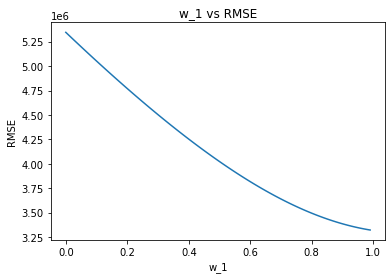

In [ ]:
result = []
for eps in np.arange(0.0, 1.0, 0.01):
    y_pred = (eps * y_pred_invest_cbr) + ((1-eps) * y_pred_invest_hr)
    result.append(mean_squared_error(invest_test_y, y_pred, squared=False))
plt.plot(np.arange(0.0, 1.00, 0.01), result)
plt.xlabel('w_1')
plt.ylabel('RMSE')
plt.title('w_1 vs RMSE')
plt.show()

Судя по графику, лучший результат получается, когда w_2 = 0, w_1 = 1

То есть результат на тестовой выборке для Investment остается таким же(скопировал последнюю ячейку из предыдущего пункта):

In [ ]:
y_pred = np.concatenate((y_pred_invest_cbr, y_pred_rf))
y_test = np.concatenate((invest_test_y_1, owner_test_y))
mean_squared_error(y_test, y_pred, squared=False)

2797208.9916566038